

# Step-1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections as colt

#Loading the dataset
df=pd.read_csv("customer_transactions.csv")


# Step-1 - Understanding the data and doing EDA

#0. Describe
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
TransactionID,4186.0,2093.500000,1208.538442,1.0,1047.25,2093.500,3139.75,4186.0
CustomerID,4186.0,516.165791,291.465283,1.0,270.00,522.000,762.75,1000.0
Amount,4186.0,9.028082,38.723909,-1.0,3.31,6.885,11.69,2033.0


There are no missing values.


The Minimum transaction date is: 1/1/2011
The Maximum transaction date is: 9/9/2015
Total unique customers are : 1000
Variance of the Amount Column is  1499.5411107517461
      TransactionID TransactionDate  CustomerID  Amount  year
2869           2870        1/1/2011         707    2.46  2011
3755           3756        1/1/2012         911    6.59  2012
3752           3753        1/1/2012         909   14.24  2012
1640           1641        1/1/2012         403   11.12  2012
132             133        1/1/2012          34   12.03  2012


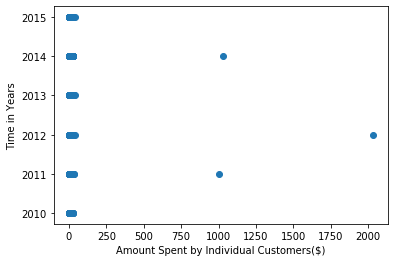

In [2]:
#Step -1 - 2. What are range of dates in dataset?

print("The Minimum transaction date is:",df['TransactionDate'].min())
print("The Maximum transaction date is:",df['TransactionDate'].max())

#Step 1 - 3. How many unique customers are in dataset?

print('Total unique customers are :',df["CustomerID"].nunique())

#Step 1 - 4 - Profile the data to give statistical description for Amount Field?
print('Variance of the Amount Column is ',df['Amount'].var())
#Ans - Done above


#Step 1-5 - DO transcation amounts increase over time?
sorted_df = df.sort_values(by = 'TransactionDate')
#sorted_df.head()

sorted_df['year'] = pd.DatetimeIndex(sorted_df['TransactionDate']).year
print(sorted_df.head())

plt.scatter(sorted_df['Amount'],sorted_df['year'],marker='o')
plt.ylabel("Time in Years")
plt.xlabel("Amount Spent by Individual Customers($)")
plt.show()


We can say that baring a couple of instances, the transaction amount has not increased over the years.

# Step-2

Yes, there are outliers

Dropping rows where the amount is negative:
      TransactionID TransactionDate  CustomerID  Amount
49               50       5/12/2012          13    -1.0
3326           3327       1/16/2014         811    -1.0

Dropping rows where the amount is 3 std deviations away - gretaer than 120:
      TransactionID TransactionDate  CustomerID  Amount
23               24       10/7/2011           7  1003.0
211             212       5/14/2014          54  1027.0
4177           4178       8/13/2012        1000  2033.0


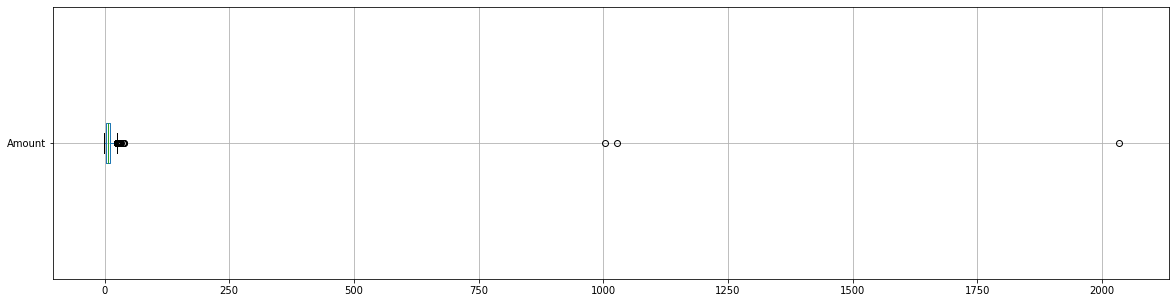

In [3]:
#1.Are there any outliers?
sorted_df.boxplot(column='Amount',vert=False,figsize =(20,5))
print('Yes, there are outliers\n')

#2. If so how would you treat them?

print('Dropping rows where the amount is negative:')
delete1 = df[df['Amount']<0]
print(delete1)
df.drop(df[df.Amount < 0].index, inplace=True)

print()

print('Dropping rows where the amount is 3 std deviations away - gretaer than 120:')
delete2 =df[df['Amount']>120] # 
print(delete2)
df.drop(df[df.Amount > 120].index, inplace=True)

# Step-3: Find origin year of customers

In [4]:
#Extracting year from transaction date and then sorting on Customer ID and year
df['year'] = pd.DatetimeIndex(df['TransactionDate']).year
new_df=df.sort_values(['CustomerID', 'year'], ascending=[True, True])
print('The data before:\n',new_df.head())


#Using groupby function, finding the origin year of every customer
grp = new_df.groupby('CustomerID')['year'].min()
#grp

#Merging the above dataframe with the original and renaming the column
df_merge_col = pd.merge(new_df, grp, on='CustomerID')
df_merge_col.rename(columns = {'year_y':'OriginYear'}, inplace = True)
#df_merge_col

#converting transaction date as date time format for comparison purposes
df_merge_col['TransactionDate']=pd.to_datetime(df_merge_col['TransactionDate'])
print('\nThe data after:\n',df_merge_col)

The data before:
    TransactionID TransactionDate  CustomerID  Amount  year
0              1        9/4/2012           1   20.26  2012
1              2       5/15/2012           2   10.87  2012
4              5      10/13/2012           2    3.94  2012
5              6       1/23/2013           2   12.37  2013
7              8      11/17/2013           2    2.75  2013

The data after:
       TransactionID TransactionDate  CustomerID  Amount  year_x  OriginYear
0                 1      2012-09-04           1   20.26    2012        2012
1                 2      2012-05-15           2   10.87    2012        2012
2                 5      2012-10-13           2    3.94    2012        2012
3                 6      2013-01-23           2   12.37    2013        2012
4                 8      2013-11-17           2    2.75    2013        2012
...             ...             ...         ...     ...     ...         ...
4176           4182      2013-06-23        1000    3.86    2013        2010
41

# Step-4 : Calculate cumulative transaction amounts

In [5]:
#Here I am making groups of customers based upon there Origin Years
#Then in a row, I am storing the values based upon given conditions 
grp2010 = df_merge_col[df_merge_col["OriginYear"]==2010]


row1=[]
grp2010_R12=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2010-12-31"))][["Amount"]].sum()
grp2010_R24=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2011-12-31"))][["Amount"]].sum()
grp2010_R36=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2012-12-31"))][["Amount"]].sum()
grp2010_R48=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2013-12-31"))][["Amount"]].sum()
grp2010_R60=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2014-12-31"))][["Amount"]].sum()
grp2010_R72=grp2010[np.logical_and((grp2010['TransactionDate']>="2010-01-01"), (grp2010['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row1.extend((grp2010_R12[0],grp2010_R24[0],grp2010_R36[0],grp2010_R48[0],grp2010_R60[0],grp2010_R72[0]))


row2=[]
grp2011=df_merge_col[df_merge_col["OriginYear"]==2011]
grp2011_R12=grp2011[np.logical_and((grp2011['TransactionDate']>="2011-01-01"), (grp2011['TransactionDate']<="2011-12-31"))][["Amount"]].sum()
grp2011_R24=grp2011[np.logical_and((grp2011['TransactionDate']>="2011-01-01"), (grp2011['TransactionDate']<="2012-12-31"))][["Amount"]].sum()
grp2011_R36=grp2011[np.logical_and((grp2011['TransactionDate']>="2011-01-01"), (grp2011['TransactionDate']<="2013-12-31"))][["Amount"]].sum()
grp2011_R48=grp2011[np.logical_and((grp2011['TransactionDate']>="2011-01-01"), (grp2011['TransactionDate']<="2014-12-31"))][["Amount"]].sum()
grp2011_R60=grp2011[np.logical_and((grp2011['TransactionDate']>="2011-01-01"), (grp2011['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row2.extend((grp2011_R12[0],grp2011_R24[0],grp2011_R36[0],grp2011_R48[0],grp2011_R60[0]))


row3=[]
grp2012=df_merge_col[df_merge_col["OriginYear"]==2012]
grp2012_R12=grp2012[np.logical_and((grp2012['TransactionDate']>="2012-01-01"), (grp2012['TransactionDate']<="2012-12-31"))][["Amount"]].sum()
grp2012_R24=grp2012[np.logical_and((grp2012['TransactionDate']>="2012-01-01"), (grp2012['TransactionDate']<="2013-12-31"))][["Amount"]].sum()
grp2012_R36=grp2012[np.logical_and((grp2012['TransactionDate']>="2012-01-01"), (grp2012['TransactionDate']<="2014-12-31"))][["Amount"]].sum()
grp2012_R48=grp2012[np.logical_and((grp2012['TransactionDate']>="2012-01-01"), (grp2012['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row3.extend((grp2012_R12[0],grp2012_R24[0],grp2012_R36[0],grp2012_R48[0]))


row4=[]
grp2013=df_merge_col[df_merge_col["OriginYear"]==2013]
grp2013_R12=grp2013[np.logical_and((grp2013['TransactionDate']>="2013-01-01"), (grp2013['TransactionDate']<="2013-12-31"))][["Amount"]].sum()
grp2013_R24=grp2013[np.logical_and((grp2013['TransactionDate']>="2013-01-01"), (grp2013['TransactionDate']<="2014-12-31"))][["Amount"]].sum()
grp2013_R36=grp2013[np.logical_and((grp2013['TransactionDate']>="2013-01-01"), (grp2013['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row4.extend((grp2013_R12[0],grp2013_R24[0],grp2013_R36[0]))


row5=[]
grp2014=df_merge_col[df_merge_col["OriginYear"]==2014]
grp2014_R12=grp2014[np.logical_and((grp2014['TransactionDate']>="2014-01-01"), (grp2014['TransactionDate']<="2014-12-31"))][["Amount"]].sum()
grp2014_R24=grp2014[np.logical_and((grp2014['TransactionDate']>="2014-01-01"), (grp2014['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row5.extend((grp2014_R12[0],grp2014_R24[0]))


row6=[]
grp2015=df_merge_col[df_merge_col["OriginYear"]==2015]
grp2015_R12=grp2015[np.logical_and((grp2015['TransactionDate']>="2015-01-01"), (grp2015['TransactionDate']<="2015-12-31"))][["Amount"]].sum()
row6.append(grp2015_R12[0])





In [6]:
final_frame = [list(row1),list(row2),list(row3),list(row4),list(row5),(row6)]
Amount_cmltv = pd.DataFrame(final_frame, columns=['12','24','36','48','60','72'])
Amount_cmltv=Amount_cmltv.fillna(0)
Origin = ["2010","2011","2012","2013","2014","2015"]
Amount_cmltv["Origin"]=Origin
Amount_cmltv.set_index("Origin")


,12,24,36,48,60,72
Origin,,,,,,
2010,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2012,2181.35,3874.69,5226.86,6501.85,0.00,0.00
2013,2179.85,3609.81,5227.75,0.00,0.00,0.00
2014,1830.85,3262.05,0.00,0.00,0.00,0.00
2015,1912.17,0.00,0.00,0.00,0.00,0.00


Amount.cmltv

# Step - 5 : Calculate cumulative transaction amounts:

In [7]:
#finding unique number of customers in each origin year group
first = [grp2010['CustomerID'].nunique()]*6
second = [grp2011['CustomerID'].nunique()]*5
third= [grp2012['CustomerID'].nunique()]*4
fourth = [grp2013['CustomerID'].nunique()]*3
fifth =[grp2014['CustomerID'].nunique()]*2
sixth = [grp2015['CustomerID'].nunique()]

#Making a frame out of it and displaying
final_frame2 = [first,second,third,fourth,fifth,sixth]
NewCustomers_cmltv = pd.DataFrame(final_frame2, columns=['12','24','36','48','60','72'])
NewCustomers_cmltv=NewCustomers_cmltv.fillna(0)
Origin = ["2010","2011","2012","2013","2014","2015"]
NewCustomers_cmltv["Origin"]=Origin
NewCustomers_cmltv.set_index("Origin")


,12,24,36,48,60,72
Origin,,,,,,
2010,172,172.0,172.0,172.0,172.0,172.0
2011,170,170.0,170.0,170.0,170.0,0.0
2012,163,163.0,163.0,163.0,0.0,0.0
2013,180,180.0,180.0,0.0,0.0,0.0
2014,155,155.0,0.0,0.0,0.0,0.0
2015,160,0.0,0.0,0.0,0.0,0.0


NewCustomers.cmltv

# Step 6: Historic CLV

In [8]:
#Using HistoricCLV = Amount/NewCustomers, finding the rows of data and then displaying in dataframe
a=np.array(row1)/np.array(first)
b=np.array(row2)/np.array(second)
c=np.array(row3)/np.array(third)
d=np.array(row4)/np.array(fourth)
e=np.array(row5)/np.array(fifth)
f=np.array(row6)/np.array(sixth)


historic=pd.DataFrame([a,b,c,d,e,f], columns=['12','24','36','48','60','72'])
#historic=historic.fillna(0)
Origin = ["2010","2011","2012","2013","2014","2015"]
historic["Origin"]=Origin
historic=historic.set_index("Origin")
historic

,12,24,36,48,60,72
Origin,,,,,,
2010,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011,13.167412,22.105294,32.152882,39.430059,46.248471,NaN
2012,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013,12.110278,20.054500,29.043056,NaN,NaN,NaN
2014,11.811935,21.045484,NaN,NaN,NaN,NaN
2015,11.951063,NaN,NaN,NaN,NaN,NaN


HistoricCLV

Blue - 2010 Origin Cust
Red - 2011 Origin Cust
Green - 2012 Origin Cust
Yellow - 2013 Origin Cust
Pink - 2014 Origin Cust
Black - 2015 Origin Cust


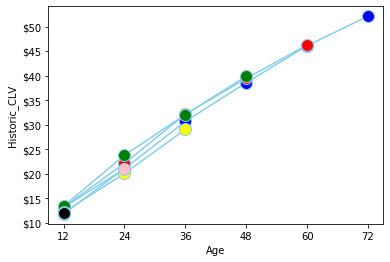

In [9]:
x=['12','24','36','48','60','72']
plt.plot( historic.iloc[0], marker='o', markerfacecolor='blue', markersize=12, color='skyblue')
plt.plot( historic.iloc[1], marker='o', markerfacecolor='red', markersize=12, color='skyblue')
plt.plot( historic.iloc[2], marker='o', markerfacecolor='green', markersize=12, color='skyblue')
plt.plot( historic.iloc[3], marker='o', markerfacecolor='yellow', markersize=12, color='skyblue')
plt.plot( historic.iloc[4], marker='o', markerfacecolor='pink', markersize=12, color='skyblue')
plt.plot( historic.iloc[5], marker='o', markerfacecolor='black', markersize=12, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Historic_CLV")
plt.yticks([10,15,20,25,30,35,40,45,50],['$10','$15','$20','$25','$30','$35','$40','$45','$50'])

print('Blue - 2010 Origin Cust\nRed - 2011 Origin Cust\nGreen - 2012 Origin Cust\nYellow - 2013 Origin Cust\nPink - 2014 Origin Cust\nBlack - 2015 Origin Cust')

1. How much have customers acquired in 2011 spend to date?

Ans - 7862.24$ from 2011 till 2015 

2. Do each group of customers exhibit similar or different patterns of spending? What's the implication for the business?

Ans - Yes, the customers exhibit similar patterns of spending. It's business impact is that the revenue from each customer will keep going up till the customer is an active member of the business.

# Step-7 : Finding Weighted CLV

In [10]:
#filling NaN values with 0 for calculation purposes
historic.fillna(0)
NewCustomers_cmltv.fillna(0)

#Using for loop and formula given , calculating the HistoricCLV for all origin years
divisor = []
numerator=[]
upperwala=[]

for i in range(0,6):
    numerator.append(np.array(historic.iloc[:,i])*np.array(NewCustomers_cmltv.iloc[:,i]))
    divisor.append(NewCustomers_cmltv.iloc[:,i].sum())

numerator=np.array(numerator)
numerator[np.isnan(numerator)] = 0

for y in range(0,len(numerator)):
    
    upperwala.append(numerator[y].sum())
    
ans=np.array(upperwala)/np.array(divisor)
final_df=pd.DataFrame()
final_df["HistoricCLV"]=ans
Age = ["12","24","36","48","60","72"]
final_df["Age"]=Age
final_df=final_df.set_index("Age")
final_df

,HistoricCLV
Age,
12,12.602350
24,21.570512
36,30.942204
48,39.281842
60,46.178158
72,52.119128


Text(0.5, 1.0, 'Weighted Average HistoricCLV for given dataset')

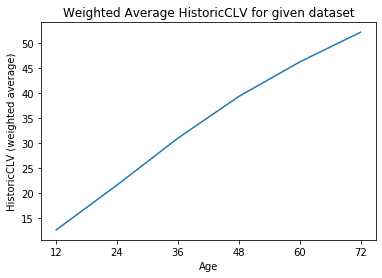

In [11]:
plt.plot(final_df['HistoricCLV'],data=final_df)
plt.xlabel("Age")
plt.ylabel("HistoricCLV (weighted average)")
plt.title("Weighted Average HistoricCLV for given dataset")